# Create the money plot of HR vs estimated Age


In [6]:
import pandas as pd
from glob import glob

In [3]:
import seaborn as sns
sns.set_style("whitegrid")

In [4]:
from scipy.stats import spearmanr

In [5]:
dataset = 'campbell'   # 'gupta' or 'campbell'

## Import HR

In [11]:
SNData = pd.read_csv('../data/CampbellHoltzman.tsv', sep='\t', usecols=['SNID', 'hr', 'err_mu'], index_col='SNID')
# SNData = pd.read_csv('../data/circlePhotometry-hr-del.tsv', sep='\t', usecols=['cid', 'hr'], index_col='cid')
# SNData = SNData['']
# SNData.describe()
SNData.rename(columns={'err_mu': 'hr uncert'}, inplace=True)
SNData.head(5)

,hr uncert,hr
SNID,,
10028,0.090201,-0.210239
1032,0.124407,-0.154126
10324,0.151389,-0.311558
10550,0.223295,0.217537
10559,0.177469,0.064661


In [19]:
if dataset == 'gupta':
    SNData = pd.read_csv('../data/Gupta11_table2.tsv', sep='\t', skiprows=2, usecols=['x_1 uncert', 'HR'])#, index_col='SN ID')
    SNData.rename(columns={'x_1 uncert': 'hr', 'HR': 'hr uncert' }, inplace=True) # 'cause read_csv is shifting the headers over by one?
SNData.head(5)

,hr
SNID,
10028,-0.210239
1032,-0.154126
10324,-0.311558
10550,0.217537
10559,0.064661


## Import Ages

**NEED TO CHANGE THIS. NO REASON TO IMPORT AGES, I JUST NEED A LIST OF ALL COMPTED FILES**

In [8]:
if dataset == 'gupta':
    pass
if dataset == 'campbell':
    files_temp = '../resources/SN*_campbell_chain.tsv'
files = glob(files_temp)


,0
0,../resources/SN10028_campbell_chain.tsv
1,../resources/SN10324_campbell_chain.tsv
2,../resources/SN1032_campbell_chain.tsv
3,../resources/SN10550_campbell_chain.tsv
4,../resources/SN10559_campbell_chain.tsv
5,../resources/SN10805_campbell_chain.tsv
6,../resources/SN11172_campbell_chain.tsv
7,../resources/SN1119_campbell_chain.tsv
8,../resources/SN11311_campbell_chain.tsv
9,../resources/SN11540_campbell_chain.tsv


In [6]:
# '../resources/ages_campbell.tsv'
#'../resources/ages_circle.tsv'
if dataset == 'gupta':
    file_ = '../resources/ages_gupta.tsv'
if dataset == 'campbell':
    file_ = '../resources/ages_campbell.tsv'
ages = pd.read_csv(file_, sep='\t', skiprows=[1], usecols=['# sn id', 'age'],
                   dtype={'# sn id': np.int32, 'age': np.float64})
ages.rename(columns={"# sn id": "cid"}, inplace=True)
ages.set_index('cid', inplace=True)
ages.head(5)
ages

,age
cid,
10028,6.343210
10324,3.951807
1032,6.117300
10550,2.510263
10559,5.349814
10805,4.566090
11172,5.167015
1119,2.563700
11311,4.269606


In [7]:
# combine with SNData
pd.concat([SNData, ages], axis=1)

,hr,age
703,-0.135564,NaN
762,0.153825,NaN
779,-0.098135,NaN
822,0.125127,NaN
859,-0.282652,NaN
893,1.161271,NaN
1032,-0.154126,6.117300
1119,0.274107,2.563700
1354,-0.111185,2.197060
1371,-0.137699,9.597481


In [8]:
# look for where I don't have an Hubble residule
helpme = pd.concat([SNData, ages], axis=1)
# helpme[helpme['hr']==np.nan]
helpme[np.isnan(helpme['hr'])]

,hr,age


## sample the probability dists so there is 4000 "points" not 100 million

In [9]:
# number of samples desired
num = 75

In [10]:
test= pd.concat([SNData, ages], axis=1)
test.dropna(inplace=True)  # drop rows that don't hae both HR & ages
for i in range(num):
    test['random age {}'.format(i)] = np.nan
# test.head(5)
test

,hr,age,random age 0,random age 1,random age 2,random age 3,random age 4,random age 5,random age 6,random age 7,...,random age 65,random age 66,random age 67,random age 68,random age 69,random age 70,random age 71,random age 72,random age 73,random age 74
1032,-0.154126,6.117300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1119,0.274107,2.563700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1354,-0.111185,2.197060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1371,-0.137699,9.597481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1415,-0.215850,7.989088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1504,0.054432,4.916429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2532,0.254258,6.278867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3205,0.812788,3.087827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3331,-0.101466,5.772627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3674,0.450921,1.685627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
if dataset == 'gupta':
    files = '../resources/SN{}_gupta_chain.tsv'
if dataset == 'campbell':
    files = '../resources/SN{}_campbell_chain.tsv'
# for i in SNData.index.values:
for i in test.index.values:
    ages_ = pd.read_csv(files.format(i), sep='\t', skiprows=[1],
                        usecols=['age'], dtype={'age': np.float64})
    # Get 10 random values of ages_
    # Use randint because it is half open: [low, high)
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html
    # Unlike random_integer
    index=np.random.randint(len(ages_), size=num)
    # add the randomly collected ages to the dataframe.
    # `.loc` allows access to the `num` random age "cells"
    # `.values` takes the ages_ from a series to a array
    # `.reshape` takes the (`num`,1) column array and makes it a horizontal array
    test.loc[i, 'random age 0':'random age {}'.format(num-1)] = ages_.values[index].reshape(num)
test.head(5)

,hr,age,random age 0,random age 1,random age 2,random age 3,random age 4,random age 5,random age 6,random age 7,...,random age 65,random age 66,random age 67,random age 68,random age 69,random age 70,random age 71,random age 72,random age 73,random age 74
1032,-0.154126,6.117300,8.134661,2.959372,5.322968,6.596631,8.730217,1.566482,8.115718,6.445965,...,4.701127,3.747880,2.975134,8.139484,1.613672,10.331738,4.211816,8.694365,0.944798,3.304668
1119,0.274107,2.563700,1.102827,2.629763,1.820296,1.479148,1.675935,1.980217,3.957553,2.203437,...,2.107977,2.130565,2.316556,1.399103,3.610226,1.599208,2.606470,3.575895,1.084797,3.727506
1354,-0.111185,2.197060,2.344721,4.430513,2.226502,8.415380,2.058932,5.167085,7.619837,1.686947,...,1.935562,2.331261,2.492557,1.527255,1.041359,3.223472,2.020540,1.297409,3.108275,1.716295
1371,-0.137699,9.597481,9.814257,9.986449,9.019932,4.139402,2.179693,10.360859,9.360053,10.948061,...,2.326855,11.186083,10.576142,10.872686,8.937059,10.145777,8.571715,9.699009,10.696965,9.595798
1415,-0.215850,7.989088,1.612269,8.247280,0.796514,2.313504,0.888228,7.591071,0.657040,9.998859,...,1.291997,8.886217,0.991704,1.202430,8.494673,2.525378,8.224367,1.973313,6.585271,2.039718


## Get scatter points for background 

This may need to be a 2d-histogram in the future if I use meshgrid

In [12]:
# make sure you add the dtype, or else the regression plots do not work
plot = pd.DataFrame(columns=['hr', 'age'], dtype=np.float64)
plot.loc[0] = 1

for index in range(len(test)):
    for num_ in range(num):
# test.loc[index+1, 'random age {}'.format(num_)]
        # add a small bit of noice on the HR to let the linear fitting work.
        # this remvoes the fact that so many have the SAME HR.
        plot.loc[index*num+num_, ['hr', 'age']] = [test.iloc[index]['hr']+0.001*np.random.randn(1)[0],
                                                   test.iloc[index]['random age {}'.format(num_)]]
#         print(plot[index*num_+num_, ['hr', 'age']])
#         plot.loc[index_*num_+num_, ['hr', 'age']] = test[index, 'random age {}'.format(num_)]

plot.head(5)

,hr,age
0,-0.155510,8.134661
1,-0.152512,2.959372
2,-0.153053,5.322968
3,-0.153257,6.596631
4,-0.152263,8.730217


## get "binned values"

In [ ]:
delta_age = 0.2
    # for each a age range
        # calculate the HR distribution -- number of chain points (in all SN)

## make the plot

First just the background representative plot, then add the "binned values" on top.

### Background plot

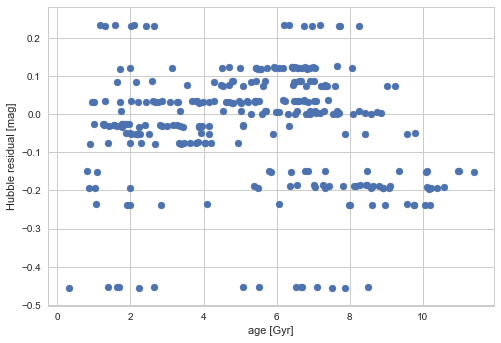

In [318]:
plt.scatter(plot['age'], plot['hr'])
plt.xlabel('age [Gyr]')
plt.ylabel('Hubble residual [mag]')
plt.show()

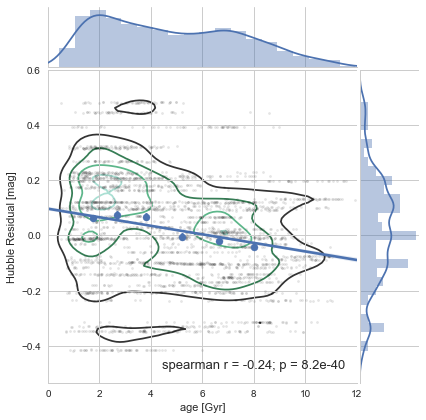

In [55]:
fig = plt.figure('seaborn regression')
# We could do a bunch of this in one line, or I can split it up and comment it out.
# https://seaborn.pydata.org/generated/seaborn.JointGrid.html#seaborn.JointGrid
# set figure with pandas data
g = sns.JointGrid(x='age', y='hr', data=plot, space=0.05, xlim=(0,12))
# create center plot with multiple layers
g = g.plot_joint(plt.scatter, s=5, alpha=0.1, color='k')
g = g.plot_joint(sns.regplot, x_bins=6, #marker='.', 
                 ci=68)#, 
#                  scatter_kws=dict(alpha=0.5))
# g = g.plot_joint(plt.hexbin)
g = g.plot_joint(sns.kdeplot, zorder=0, n_levels=4)
# create marginal plots
g = g.plot_marginals(sns.distplot, kde=True)#, color=".5")
#  _ = g.ax_marg_x.hist(tips["total_bill"], color="b", alpha=.6,
#                       bins=np.arange(0, 60, 5))
# _ = g.ax_marg_y.hist(tips["tip"], color="r", alpha=.6,
#                      orientation="horizontal",
#                      bins=np.arange(0, 12, 1))
# update figure annotations
g = g.annotate(spearmanr, #template="{stat}: {val:.2f}",
                stat="spearman r", loc="lower right", fontsize=13)
g = g.set_axis_labels('age [Gyr]', 'Hubble Residual [mag]')
# oneline/high level alternative
# https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot
# g = sns.jointplot(plot['age'], plot['hr'], stat_func=spearmanr, kind="hex",
#               marginal_kws=dict(kde=True),# rug=True),
#               annot_kws=dict(stat="spearman r"),
# #               s=5, alpha=0.7
#              ).plot_joint(sns.kdeplot, zorder=0, n_levels=4)
plt.show()
# g.savefig('GlobalHRvAge.pdf')


# sns.lmplot
# sns.jointplot("age", "hr", data=plot, kind="reg")
# sns.regplot(x="age", y="hr", data=plot)
# sns.lmplot(x='age', y='hr', data=plot)

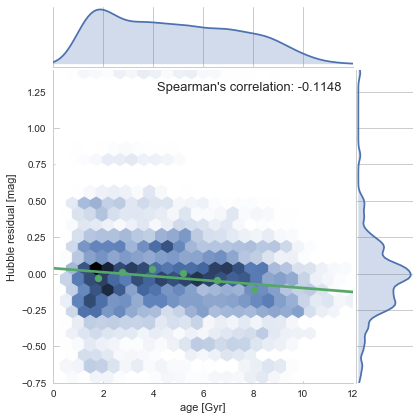

In [29]:
#'rug':True in marginal_kws, makes it very slow and looks like a solid line
g = sns.jointplot(plot['age'], plot['hr'], stat_func=spearmanr, kind="hex", gridsize=25,
                  bins=None, space=0.05, xlim=(0,12), ylim=(-0.75, 1.4),
                  marginal_kws={'kde':True, 'hist':False,
                                'kde_kws':{"shade":True}
                               })

# g = g.plot_joint(plt.scatter, alpha=0) #skip green color
g = g.plot_joint(sns.regplot, x_bins=6)#,  # not really needed anymore
#                  ci=68)

# This is plotted on top of jointplot's forced marginals
# g = g.plot_marginals(sns.distplot, kde=True)  # currently the best option
# g = g.plot_marginals(sns.distplot, kde=True, hist=False, kde_kws={"shade" : True})
# g = g.plot_marginals(sns.kdeplot, shade=True, cumulative=True, hist=False)

g = g.annotate(spearmanr, stat="Spearman's correlation",
               loc="upper right", fontsize=13, 
               template="{stat}: {val:.4f}")
# it looks like <abs(0.3) for spearman r is not very correlated.
g = g.set_axis_labels('age [Gyr]', 'Hubble residual [mag]')

# g.savefig('LocalHRvAge-today2.pdf')
plt.show()

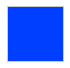

In [18]:
current_palette = sns.color_palette('bright',1)
sns.palplot(current_palette)
plt.show()

In [106]:
sns.set_palette(sns.color_palette())

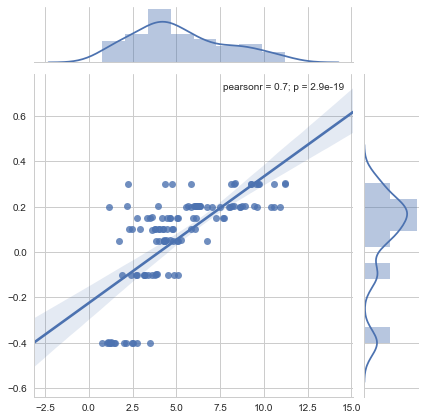

In [264]:
# sns.jointplot(test['age'].values, test['hr'].values, kind="reg")#,
              #joint_kws=dict(robust=True))
a1=np.array(plot['age'].values, dtype=np.float64)
h1=np.array(plot['hr'].values, dtype=np.float64)
sns.jointplot(a1, h1, kind="reg")
plt.show()

In [265]:
plot['age']

0      11.2113
1      4.35541
2      9.57311
3      5.81447
4      9.68495
5      9.25124
6      11.2175
7      4.76801
8      8.36558
9      8.26504
10     9.72038
11     10.5923
12     8.13672
13     9.27794
14     2.25263
15      9.5973
16     6.16513
17     6.34648
18     9.44622
19     2.19813
20     10.9108
21     3.97596
22     10.4105
23     7.48587
24     8.92736
25     10.6035
26     8.00237
27     8.77206
28     8.61049
29     1.12437
        ...   
90     6.74031
91     4.80232
92     1.74428
93     5.06914
94      5.2651
95      3.8188
96     4.29684
97     3.99514
98     4.30498
99     5.05453
100    4.39045
101    4.62144
102    4.27777
103    4.26937
104     4.3279
105    2.74053
106    5.08935
107    7.73209
108    5.93643
109    4.44152
110    7.64224
111    5.03226
112    4.65988
113     4.6329
114    3.35009
115    4.16414
116    3.46919
117    7.23874
118    6.14983
119    3.59919
Name: age, Length: 120, dtype: object

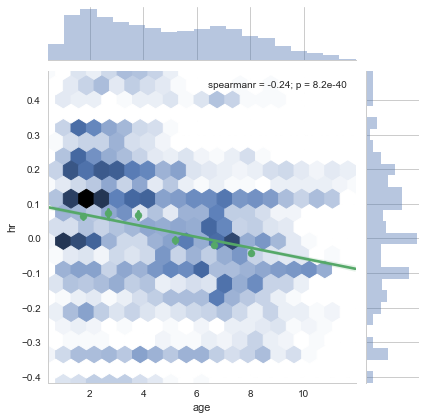

In [52]:
g = sns.jointplot(plot['age'], plot['hr'], stat_func=spearmanr, kind="hex", gridsize=20, bins=None)
g = g.plot_joint(sns.regplot, x_bins=6,
                 ci=68)
plt.show()

### Add "binned" values